In [3]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels =pd.DataFrame(iris.target)
# labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length', 'Sepal width', 'Petal length','Petal width']
data['label']=labels

In [4]:
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


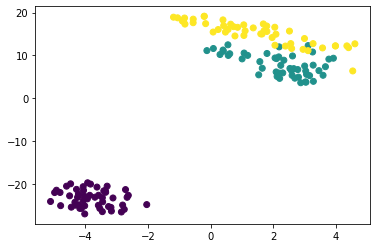

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(feature)
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=labels)
plt.show()

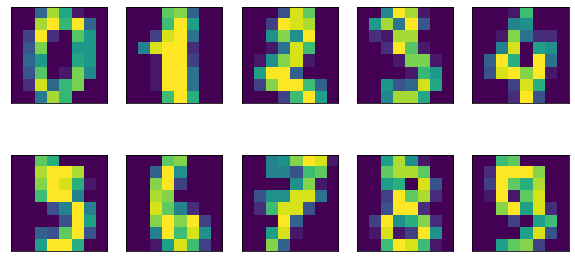

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(),'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [17]:
print(digits.data.shape)
print(digits.data[0])
print(digits.target)

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


[[ -1.25946647  21.27488366]
 [  7.95761181 -20.7686957 ]
 [  6.99192283  -9.95598797]
 ...
 [ 10.8012832   -6.9602548 ]
 [ -4.87209972  12.42395284]
 [ -0.3443905    6.3655442 ]]


Text(0, 0.5, 'Second PCA')

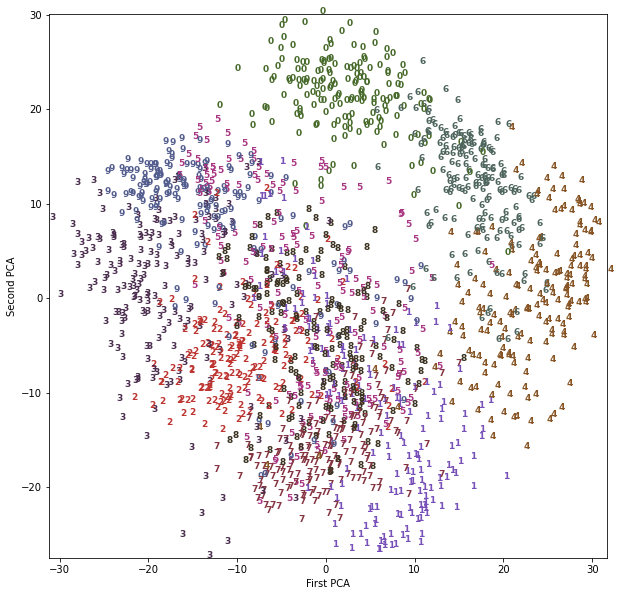

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

print(digits_pca)
colors = ['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
print(digits_tsne)

[[ 61.356194   -7.714884 ]
 [-19.206793  -24.6756   ]
 [  4.9995327 -15.126944 ]
 ...
 [ -4.935252  -10.072807 ]
 [  2.8231556  19.333818 ]
 [ -0.7606059  -4.9799633]]


Text(0, 0.5, 't-sne 특성 1')

C:\Users\shanolulu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shanolulu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shanolulu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\shanolulu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


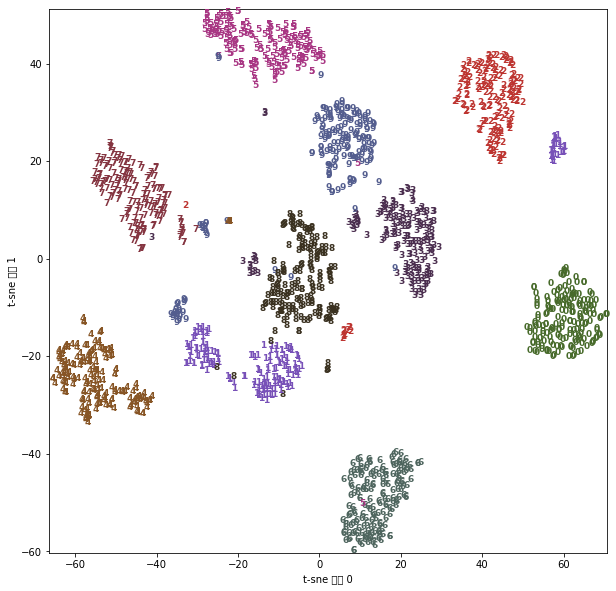

In [20]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color =colors[digits.target[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel('t-sne 특성 0')
plt.ylabel('t-sne 특성 1')